# 导入相关的包

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['simhei']#用于正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用于正常显示负号
import tushare as ts
import pandas as pd
import numpy as np

# 获取股票数据

In [5]:
# 茅台股票代码
ts_code='600519'
df=ts.get_hist_data(ts_code)
# #获取前三个月数据
# df=df.iloc[:90,:]
df

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2020-12-14,1827.77,1829.98,1829.00,1815.00,33052.00,9.00,0.49,1834.380,1800.142,1765.891,37817.49,39118.36,35267.15,0.26
2020-12-11,1834.78,1837.32,1820.00,1804.81,30775.79,-12.90,-0.70,1831.060,1788.633,1760.943,42873.36,39007.17,35145.22,0.24
2020-12-10,1840.00,1849.77,1832.90,1828.00,32653.54,-7.10,-0.39,1825.682,1780.423,1755.193,49216.44,38086.45,35014.21,0.26
2020-12-09,1865.95,1866.00,1840.00,1839.00,31152.12,-10.00,-0.54,1808.902,1770.572,1750.288,48586.88,37143.93,34555.18,0.25
2020-12-08,1815.00,1875.00,1850.00,1813.00,61454.00,37.60,2.08,1788.504,1759.260,1744.855,47070.80,36851.35,34740.11,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,766.00,778.97,765.56,764.90,32934.16,-0.97,-0.13,758.740,758.740,758.740,41401.08,41401.08,41401.08,0.26
2018-06-22,754.00,767.00,766.80,750.00,28854.81,7.48,0.98,757.035,757.035,757.035,43517.81,43517.81,43517.81,0.23
2018-06-21,765.22,778.89,759.88,758.77,39182.55,-3.71,-0.49,753.780,753.780,753.780,48405.48,48405.48,48405.48,0.31


# 处理股票数据

In [22]:
# 处理数据
data=pd.DataFrame(df[['close']])
data['date']=data.index
data['ratio']=[0.0000000000]*len(data)
data.sort_index(inplace=True)#按照日期做升序处理
data

,close,date,ratio
date,,,
2018-05-23,723.66,2018-05-23,0.0
2018-05-24,715.00,2018-05-24,0.0
2018-05-25,716.82,2018-05-25,0.0
2018-05-28,740.50,2018-05-28,0.0
2018-05-29,731.40,2018-05-29,0.0
...,...,...,...
2020-11-16,1730.05,2020-11-16,0.0
2020-11-17,1715.80,2020-11-17,0.0
2020-11-18,1693.65,2020-11-18,0.0


# 计算股票比率

In [23]:
#计算股价比率
for i in range(data.shape[0]-1):
    data.iloc[i+1,2]=np.log(float(data.iloc[i+1,0])/float(data.iloc[i,0]))
data

,close,date,ratio
date,,,
2018-05-23,723.66,2018-05-23,0.000000
2018-05-24,715.00,2018-05-24,-0.012039
2018-05-25,716.82,2018-05-25,0.002542
2018-05-28,740.50,2018-05-28,0.032501
2018-05-29,731.40,2018-05-29,-0.012365
...,...,...,...
2020-11-16,1730.05,2020-11-16,0.014585
2020-11-17,1715.80,2020-11-17,-0.008271
2020-11-18,1693.65,2020-11-18,-0.012993


# 计算基础参数

In [42]:
#计算基础参数
data_train=data.iloc[301:401,:]
data_test=data.iloc[301:401,:]
# data_test
mean=data_train['ratio'].sum()/len(data_train) #计算样本均值
S_2=((data_train['ratio']-mean)**2).sum()/(len(data_train)-1) #计算样本方差
miu=(mean+S_2/2)/1#股价漂移率
sigma=np.sqrt(S_2)#股价波动率
# print(mean,S_2,miu,sigma)

# test

[0.024626719982120456, 0.0015036660672587297, 0.009240361056304018, 0.0012129943491005287, 0.013284106010482143, -0.003745322730162053, 0.03502662211125067, 0.023366176529064444, -0.02431771605576403, 0.005470300040026128, -0.008048533563571863, 0.01173874071238483, 0.025632195716775465, -0.0028411601216184364, 0.0010883112942040546, -0.013236337900637666, 0.016738968451839663, -0.0013208019449185747, -0.005239128968814324, -0.011210671435174081, -0.049550340915969104, 0.02719072572875418, 0.0, -0.0045508306956468765, 0.048955118151344845, -0.0034003258709791604, 0.010788753112691741, -0.007301391252276133, 0.03000653759519528, -0.00848181505590923, -0.005980368101485722, 0.006619005696369079, -0.021293416625629374, 0.014760097061012077, -0.017537864530822657, 0.007116169068408742, 0.01682732013252508, 0.0045867743712913805, 0.025932026093381782, -0.034442715761290404, 0.011328749104173906, -0.006392235811750923, -0.0062193871053121946, 0.001966400838818101, -0.010207367642407471, -0.0

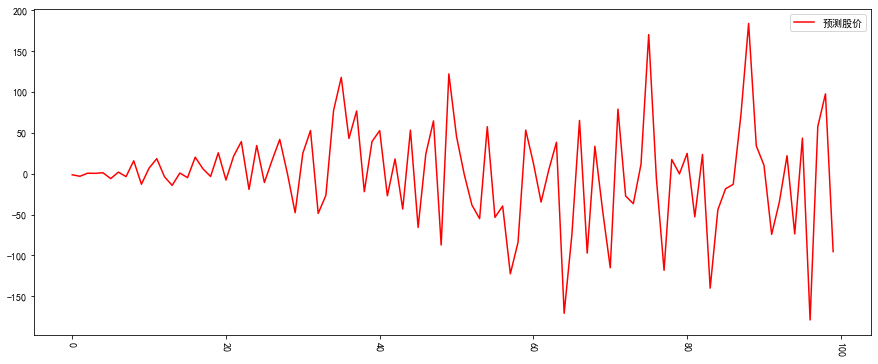

In [65]:

rlist=data_test['ratio'].tolist()

s_0=rlist[0]
plist=[]
for t in range(1,len(data_test)+1):
    Bt = np.random.normal(0, 1,t)[0]#布朗运动随机数值
    plist.append((Bt*t))
    
print(rlist)
print(plist)
print(s_0)


plt.figure(num=3,figsize=(15,6))

plt.plot(plist,label='预测股价',color='red')

plt.legend(loc='upper right')
plt.xticks(rotation=270);

# 预测股票走势

In [14]:
# #通过几何布朗运动模型预测未来周期股价
S_0=list(data_train['close'])[0]#初始股价
# print(S_0)
plist=[]#预测的股价初始化
# data_test['fore_price']=data_test['close']
# print(data_train.shape[0]+1)
np.random.RandomState(1)
for t in range(1,38): #data_train.shape[0]+1
    Bt = np.random.normal(0, 1,t)[0]#布朗运动随机数值
    plist.append(S_0*np.exp(sigma*Bt+(mean)*t)) #几何布朗运动
# data_test

# 生成未来7天日期

In [15]:
#生成未来七天日期
from datetime import datetime
datetime=datetime.now().strftime('%Y-%m-%d')
dt=pd.to_datetime(datetime)
dtlist=dt+pd.to_timedelta(np.arange(7),'D')
dtlist=np.datetime_as_string(dtlist)
dlist=[]
for i in dtlist:
    dlist.append(i[:10])
# print(dlist)

# 画出真实走势和预测走势

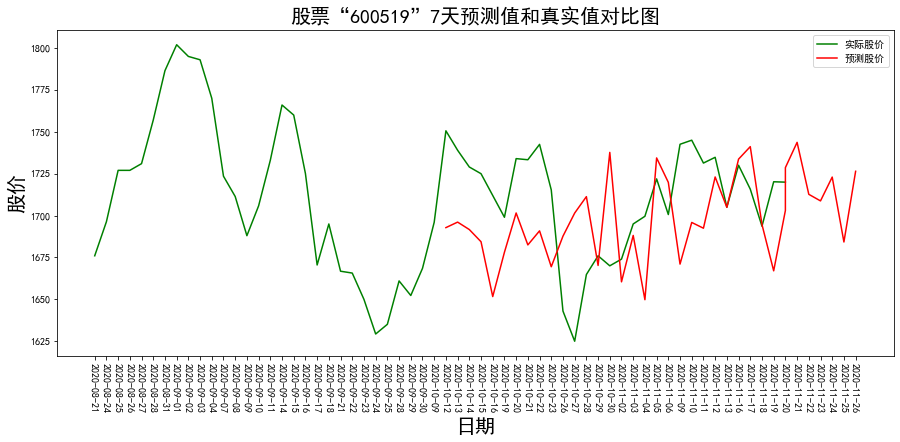

In [16]:
#画出预测值和真实值对比图
plt.figure(num=3,figsize=(15,6))
plt.plot(data['date'][30:90],data['close'][30:90],color='green',label='实际股价')
plt.plot(pd.concat([data['date'],pd.Series(dlist)])[60:],plist,label='预测股价',color='red')
plt.xlabel('日期',fontsize=20)
plt.ylabel('股价',fontsize=20)
plt.title("股票“"+ts_code+"”"+'7天预测值和真实值对比图',fontsize=20)
plt.legend(loc='upper right')
plt.xticks(rotation=270);

# 评估预测结果